<a href="https://colab.research.google.com/github/navinsambari123/Mobile-price-range-prediction/blob/main/Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

##In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.




---



# **DATA DESCRIPTION**

##1. Battery_power - Total energy a battery can store in one time measured in mAh
##2. Blue - Has bluetooth or not
##3. Clock_speed - speed at which microprocessor executes instructions
##4. Dual_sim - Has dual sim support or not
##5. Fc - Front Camera mega pixels
##6. Four_g - Has 4G or not
##7. Int_memory - Internal Memory in Gigabytes
##8. M_dep - Mobile Depth in cm
##9. Mobile_wt - Weight of mobile phone
##10. N_cores - Number of cores of processor
##11. Pc - Primary Camera mega pixels
##12. Px_height - Pixel Resolution Height
##13. Px_width - Pixel Resolution Width
##14. Ram - Random Access Memory in Mega Bytes
##15. Sc_h - Screen Height of mobile in cm
##16. Sc_w - Screen Width of mobile in cm
##17. Talk_time - longest time that a single battery charge will last when you are
##18. Three_g - Has 3G or not
##19. Touch_screen - Has touch screen or not
##20. Wifi - Has wifi or not
##21. Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



---



#**IMPORTING THE LIBRARIES**

In [5]:
# IMPORTING THE LIBRARIES AND MODULES
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# IMPORTING METRICS RELATED MODULE FROM SKLEARN LIBRARY
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix,classification_report,roc_auc_score,roc_curve, auc,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# MOUNTING WITH GOOGLE DRIVE 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# LOADING THE DATASET
data = pd.read_csv("/content/drive/MyDrive/Mobile Price Range Prediction - Navinkumar Sambari/mobile_price_range.csv")

In [8]:
# LET SEE THE FIRST FIVE ROWS OF THE DATASET
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [9]:
# LAST FIVE ROWS OF THE DATASET
data.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [10]:
# DATASET INFORMATION
def information(data):
    print(f"Dataset Shape: {data.shape}")
    information = pd.DataFrame(data.dtypes,columns=['dtypes']).reset_index()
    information['Name'] = information['index']
    information= information[['Name','dtypes']]
    information['Missing'] = data.isnull().sum().values    
    information['Uniques'] = data.nunique().values
    return information
result = information(data).sort_values('Missing', ascending= False)
print(result)

Dataset Shape: (2000, 21)
             Name   dtypes  Missing  Uniques
0   battery_power    int64        0     1094
11      px_height    int64        0     1137
19           wifi    int64        0        2
18   touch_screen    int64        0        2
17        three_g    int64        0        2
16      talk_time    int64        0       19
15           sc_w    int64        0       19
14           sc_h    int64        0       15
13            ram    int64        0     1562
12       px_width    int64        0     1109
10             pc    int64        0       21
1            blue    int64        0        2
9         n_cores    int64        0        8
8       mobile_wt    int64        0      121
7           m_dep  float64        0       10
6      int_memory    int64        0       63
5          four_g    int64        0        2
4              fc    int64        0       20
3        dual_sim    int64        0        2
2     clock_speed  float64        0       26
20    price_range    int64   

In [11]:
# CHECKING DUPLICATE RECORDS
print(f'{data.duplicated().sum()} duplicate values in our dataset.')

0 duplicate values in our dataset.


In [12]:
# UNIQUE VALUES OF EACH COLUMN
for i in data.columns:
  print(f"UNIQUE VALUES of {i}")
  print(data[i].unique())
  print("\n")

UNIQUE VALUES of battery_power
[ 842 1021  563 ... 1139 1467  858]


UNIQUE VALUES of blue
[0 1]


UNIQUE VALUES of clock_speed
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]


UNIQUE VALUES of dual_sim
[0 1]


UNIQUE VALUES of fc
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]


UNIQUE VALUES of four_g
[0 1]


UNIQUE VALUES of int_memory
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]


UNIQUE VALUES of m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]


UNIQUE VALUES of mobile_wt
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89

In [13]:
# STATISTICAL INFORMATION
pd.DataFrame(data = data.describe().T)

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [14]:
# Let us see the names of the columns
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

###We can see that sc_width column and px_height column has minimum value 0 which is not possible in any mobile. **We need to handle this mismatch**


---


# **HANDLING MISMATCH VALUES**

# In px_height column

In [15]:
# Checking observations having px_hieght value as 0.
print(f"number of observation having px_height as 0 = {data[data['px_height']==0].shape[0]}")
# Checking observations having screen width value as 0.
print(f"number of observation having screen width value as 0 = {data[data['sc_w']==0].shape[0]}")

number of observation having px_height as 0 = 2
number of observation having screen width value as 0 = 180


In [16]:
#observation of px_height  having value 0
data[data['px_height']==0]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  ...          0      1987  3692    13     0   
1933    0.6        154        8  ...          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  

[2 rows x 21 columns]

In [17]:
# As there are only 2 observations having px_height=0. so just drop it.
data.drop(data[data['px_height']==0].index, inplace=True)

In [18]:
# Rechecking the observation of px_height having value 0 after dropping 
data[data['px_height']==0]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]

# In sc_width column

In [19]:
# Checking observations having screen width value as 0.
print(f"number of observation having screen width value as 0 = {data[data['sc_w']==0].shape[0]}")

number of observation having screen width value as 0 = 179


### Observation: Earlier it was 181,but as we drop rows in px_height having value 0 then 2 rows from it also dropped. That's why it is 179 now.

###We will use KNN imputer method for imputation

In [20]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
data['sc_w']=data['sc_w'].replace(0,np.nan)

In [21]:
# import KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
data=pd.DataFrame(impute_knn.fit_transform(data),columns=data.columns)

In [22]:
# Checking shape again
data.shape

(1998, 21)

In [23]:
# Rechecking observations of 'screen width' whether the zero values are removed or not.
print(f"number of observation having screen width value as 0 = {data[data['sc_w']==0].shape[0]}")

number of observation having screen width value as 0 = 0


## Hence, we handled our mismatch column successfully



---



# **OUTLIER TREATMENT**

In [24]:
# Checking the Outliers in 'fc' column 
Q1 = data["fc"].quantile(0.25)
Q3 = data['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will consider datapoints before Q3.
data = data[(data['fc'] <= Q3)]

In [25]:
# Checking the Outliers in 'px_height' column
Q1 = data["px_height"].quantile(0.25)
Q3 = data['px_height'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will consider datapoints before Q3.
mobile_data = data[(data['px_height'] <= Q3)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


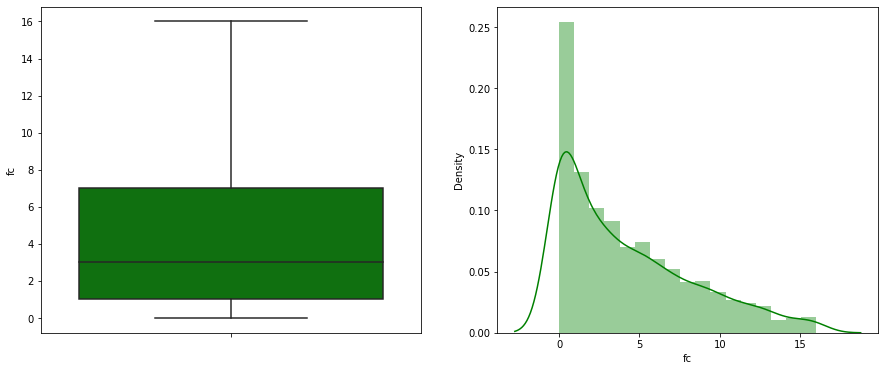

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


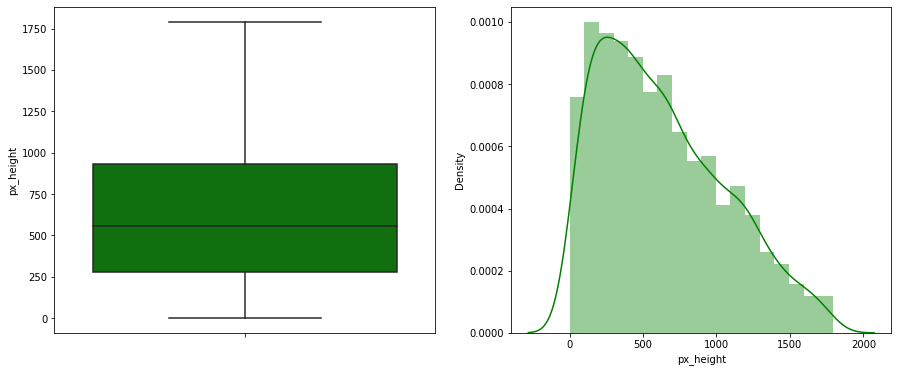

In [26]:
# let's see whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()

## We have handled outliers properly.So, there are no outliers present in our dataset.



---



# **EXPLORATORY DATA ANALYSIS**

##1) Let's visualize the value counts/distribution of target variable => **'price_range'**

2.0    497
0.0    496
1.0    494
3.0    493
Name: price_range, dtype: int64
value counts of price_range  
AxesSubplot(0.260833,0.125;0.503333x0.755)


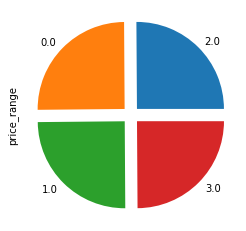

In [27]:
# Distribution of our target variable
print(data['price_range'].value_counts())
print(f"value counts of price_range  \n{data['price_range'].value_counts().plot(kind='pie', explode = [0.1,0.1,0.1,0.1])}")

###By seeing the piechart we can tell that our categorical values of target variable's distribution is equal.

###0=low cost

###1=medium cost

###2=high cost

###3=very high cost

##2) Distribution  of n_cores(no of core processor) and pc(primary camera mega pixel)

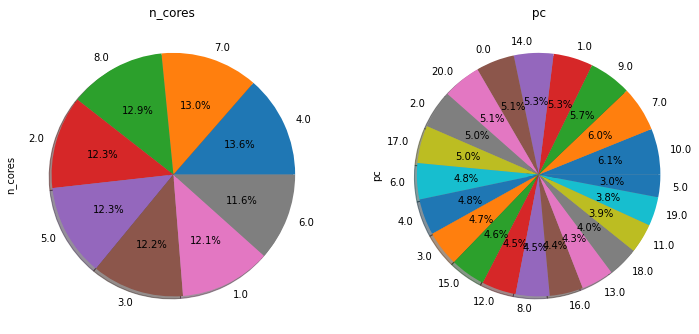

In [28]:
# Distribution of all core processors and PC
f,ax=plt.subplots(1,2,figsize=(12,12))
data['n_cores'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
data['pc'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('n_cores ')
ax[1].set_title(' pc ')

plt.show()

##3) Percentage Distribution of mobile with respect to 'three_g', 'four_g', 'blue', 'touch_screen', 'dual_sim'

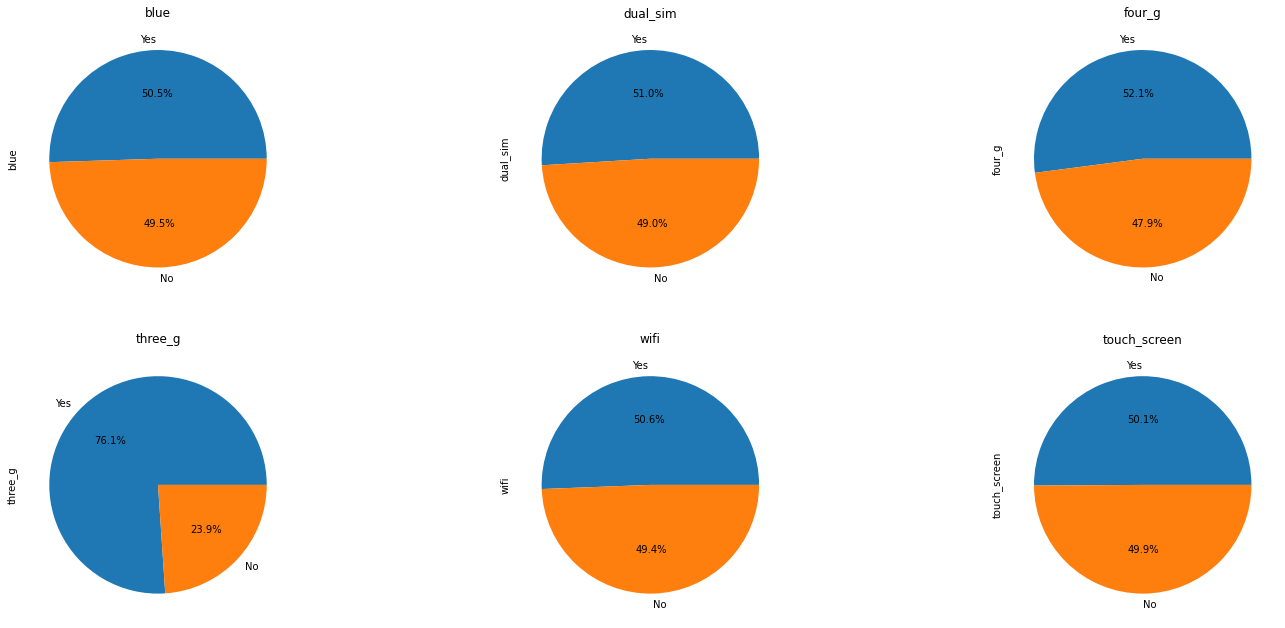

In [29]:
#let's see the percentage distribution of features supported and not supported in  mobile
columnss=['blue','dual_sim','four_g','three_g', 'wifi', 'touch_screen']
labels = ["Yes",'No']
n=1
plt.figure(figsize=(25,11))
for i in columnss:
  ax=plt.subplot(2,3,n)
  
  n=n+1
  data[i].value_counts().plot.pie(autopct='%.1f%%', labels=labels)
  ax.set_title(i)




##Observation
####1) Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost **50%**.

####2) 
####a. YES means SUPPORTED
  ####   b. NO means NOT SUPPORTED

####3) Very few mobiles(**23.9%**) do not have Three_g.

##4) Distribution of mobile features (['ram','battery_power','px_height','px_width']) wrt price range.

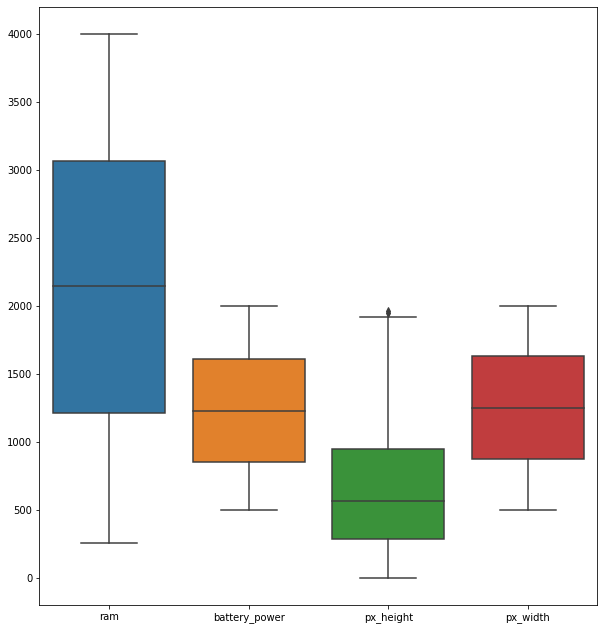

In [30]:
# Distribution of the ram, battery_power, px_height, px_width using BOXPLOT
plt.figure(figsize=(10,11))
sns.boxplot(data=data[['ram','battery_power','px_height','px_width']])
plt.show()

## 5) Price_Range VS ram, battery power, px_height, px_width

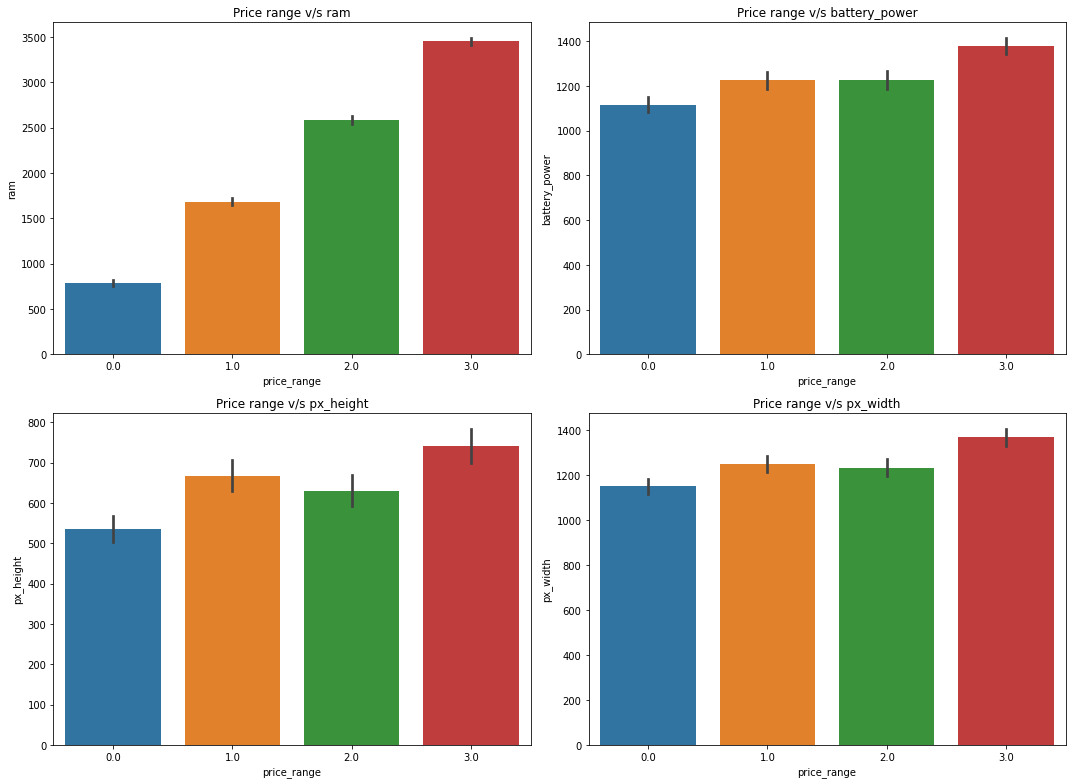

In [31]:
# Count of the mobile phones with values of Target variable wrt ram, battery_power, px_height, px_width
attributes=['ram','battery_power','px_height','px_width']
plt.figure(figsize=(15,11))
c=1
for i in attributes:
  plt.subplot(2,2,c)
  sns.barplot(x=data['price_range'],y=data[i])
  plt.title(f'Price range v/s {i}')
  c=c+1
  plt.tight_layout()

##Observation:
                
#### 1. Mobiles having RAM more than 3 GB falls under Very high cost category. As RAM increases price range also increases.

#### 2. Mobiles having RAM less than 1000 MB falls under low cost category. Mobiles with battery power more than 1300 mAh has very high cost. 

#### 3. Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category. Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

## 6) Count of mobiles in each price range with supporting or not supporting specifications.

In [32]:
# Checking the counts of binary categorical variables by grouping price range.
price_group=data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'})

Text(0, 0.5, 'Count of phones')

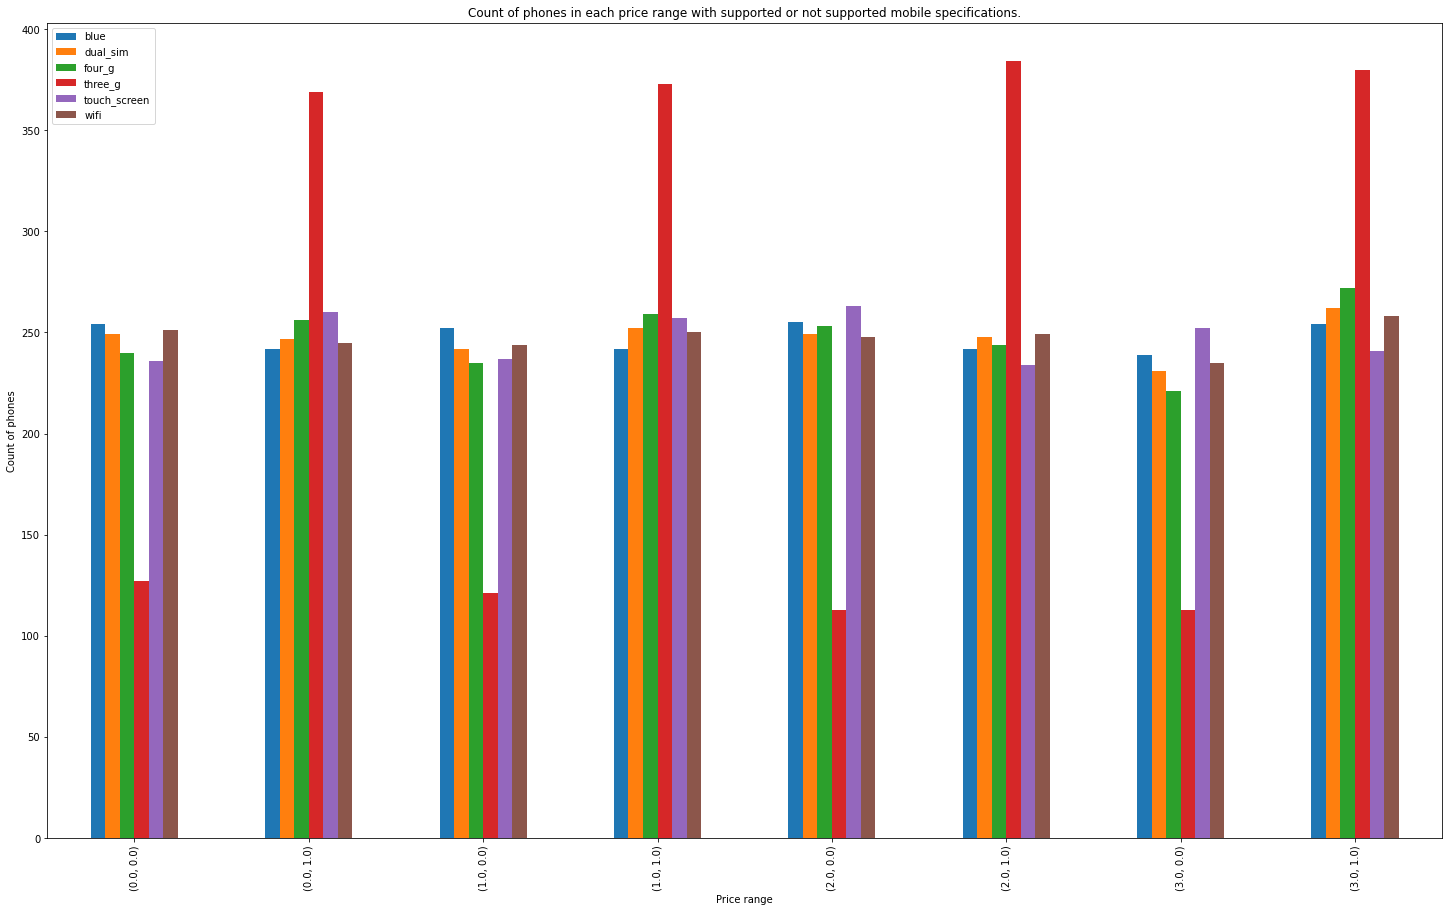

In [33]:
# visualising by plotting barchat.
# plt.figure(figsize=(12,6))
price_group.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')


##Observation:
### Each price range category has equal number of mobiles having both supporting and non supporting specifications.

##7) Count of mobiles for each n_cores and m_dep wrt price _range

<Figure size 1800x792 with 0 Axes>

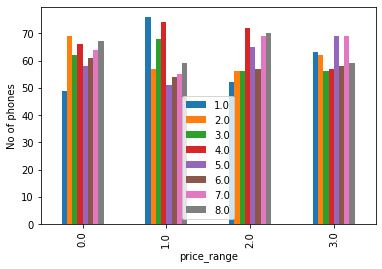

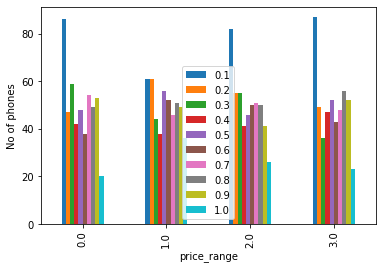

In [34]:

c=["n_cores","m_dep"]
plt.figure(figsize=(25,11))
n = 1
for i in c:
  data.groupby(['price_range'])[i].value_counts().unstack().plot(kind='bar')
  plt.legend()
  plt.xlabel('price_range')
  plt.ylabel('No of phones')

###Observation


####1. There are very few mobiles in price range 0 and 1 with lesser number of cores.

####2. Most of the mobiles in price range 2 and 3 are with high no of cores. The count of mobiles contains cores 5.0, 7.0, and 8.0 is high.

####3. Number of phones with less thickness is high and count of phones with high thickness is low.

## 8) Count of mobiles contain 3G and 4G features.

## Having 3g and 4g

In [35]:
# lets select data only of mobiles with having 3G and 4G feature
having_3g4g=data[(data['three_g']==1) & (data['four_g']==1)]

In [36]:
#count of each price range values of the mobiles whom having 3G and 4G features.
print("Count of mobile price range having 3g and 4g\n")
having_3g4g['price_range'].value_counts()

Count of mobile price range having 3g and 4g



3.0    272
1.0    259
0.0    256
2.0    244
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


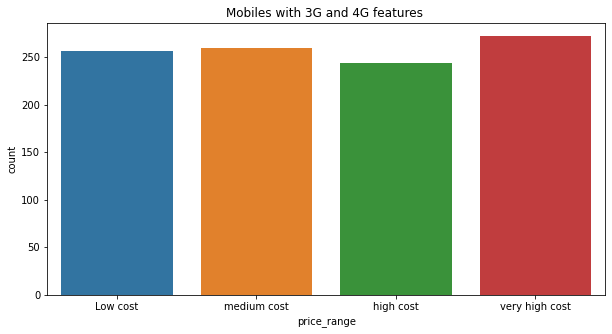

In [37]:
# lets plot the bar chart of price range vs having 3G and 4G
plt.figure(figsize=(10,5))
sns.countplot(having_3g4g['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

##Not having 3G and 4G

In [38]:
# selecting data only of mobiles with not having 3G and 4G feature
not_having_3g4g=data[(data['three_g']!=1) & (data['four_g']!=1)]

In [39]:
#count of each price range values of the mobiles whom don't have 3G and 4G features.
print("value_counts of mobile price range not having 3g and 4g\n")
not_having_3g4g['price_range'].value_counts()

value_counts of mobile price range not having 3g and 4g



0.0    127
1.0    121
3.0    113
2.0    113
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


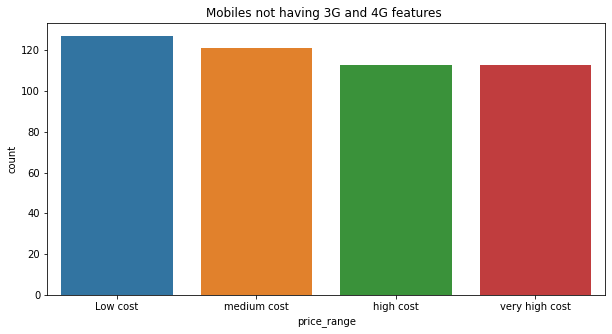

In [40]:
# Let's plot the bar chart of price range vs not having 3G and 4G
plt.figure(figsize=(10,5))
sns.countplot(not_having_3g4g['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

## Observation:

#### In the first plot, count of mobiles which contains 3G and 4G features is high and this falls under VERY HIGH COST 'Price_range' category

#### In the second plot, count of mobiles which does not contains 3G adn 4G features is high which falls under VERY LOW COST 'price_range' category.



## 9) How price effects based on number of cores.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'n_cores v/s Price range')

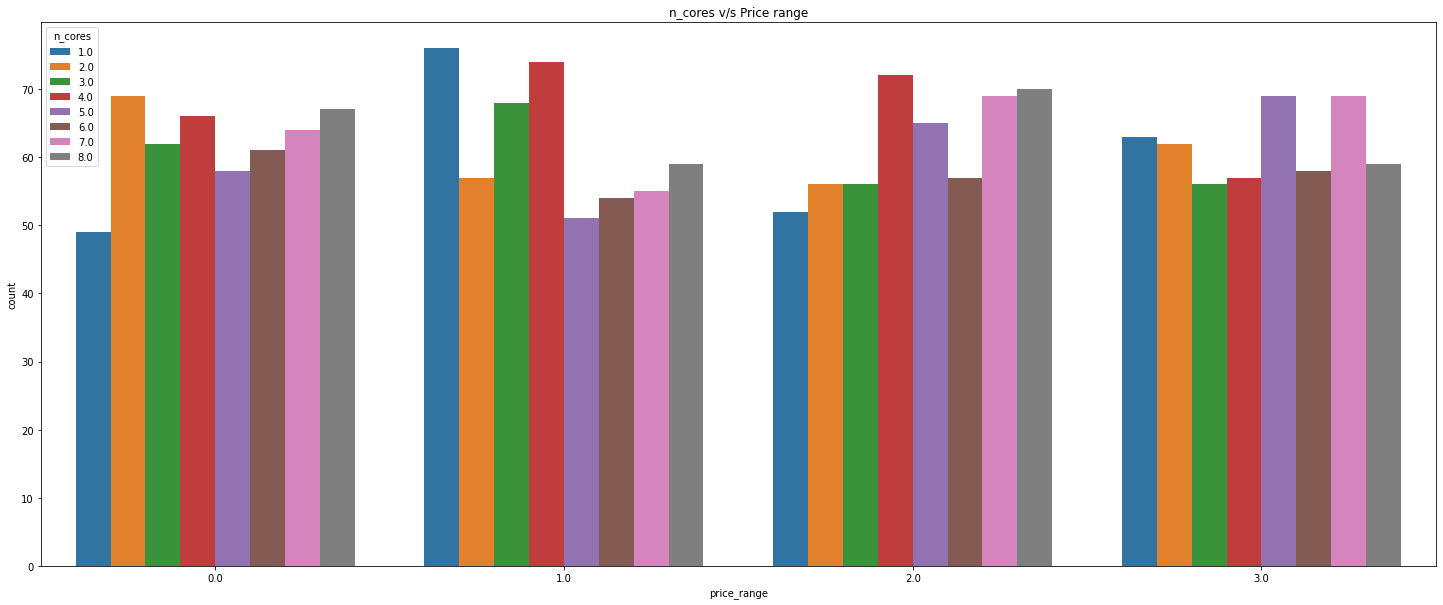

In [41]:
# counting the number of cores which was affected by price_range
plt.figure(figsize=(25,10))
sns.countplot(data['price_range'],hue=data['n_cores'])
plt.title("n_cores v/s Price range")


## Observation

#### 1. Price range 0 have majority of phones with 2 core processors.

#### 2. Price range 1 have majority of phones with 1 and 4 core processors.

#### 3. Price range 2 have majority of phones with 4 core processors

#### 4. Price range 3 have majority of phones with 5 and 7 core processors

## 10) Seeing whether our dataset is balanced or not wrt Price_Range

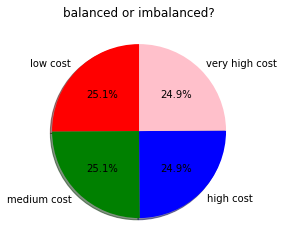

In [42]:
# Creating piechart to see the 
labels_of_price_range = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['red','green','blue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels_of_price_range, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()

## Observation
#### Looks like our dataset is balanced with respect to Price range

## 11) Line plot which shows the trend of the major features which considered wrt to Price range

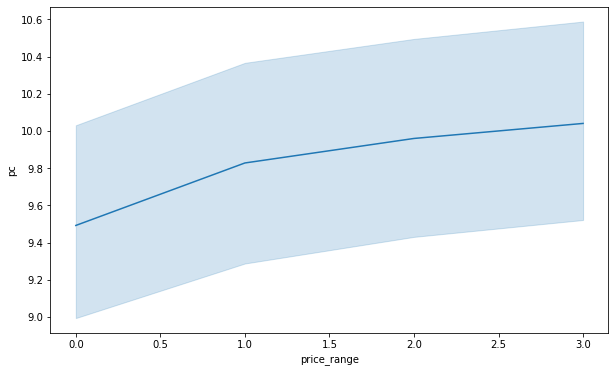

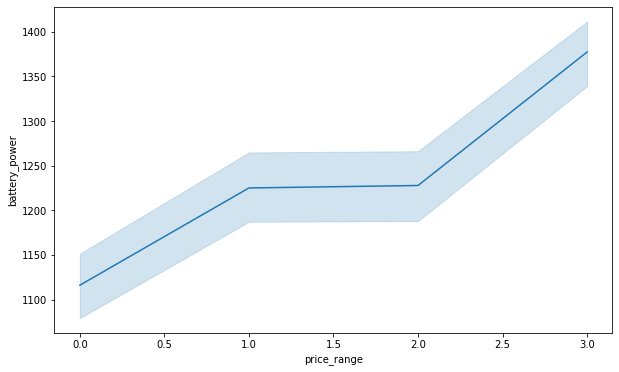

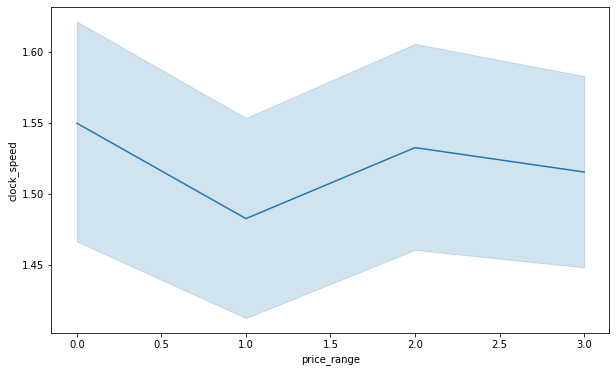

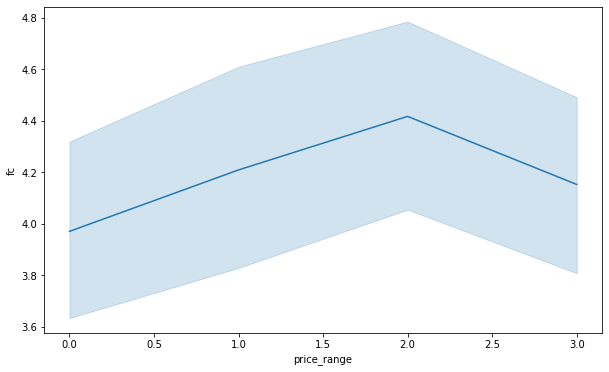

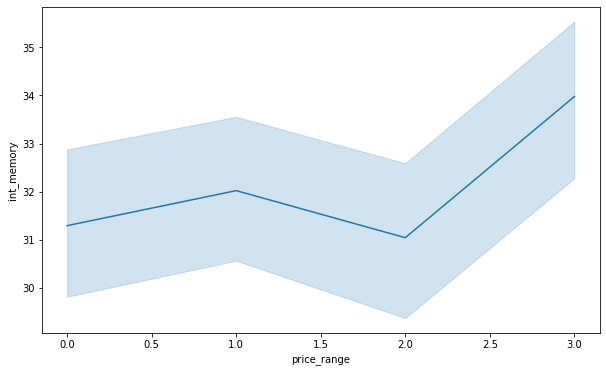

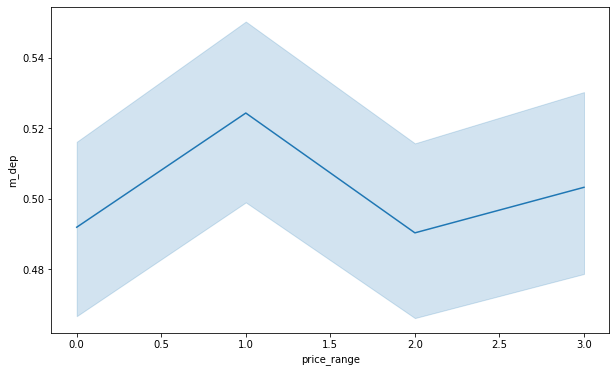

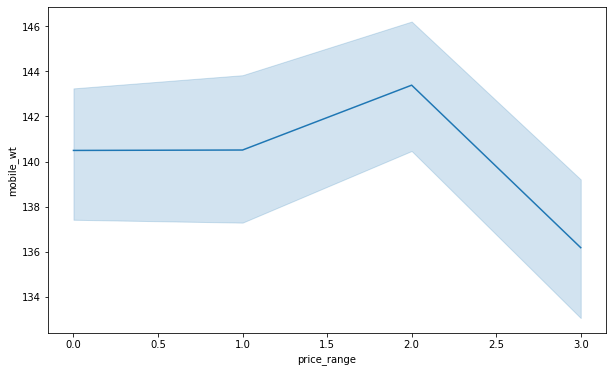

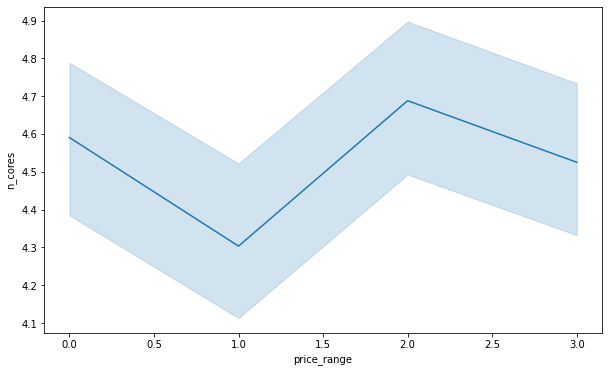

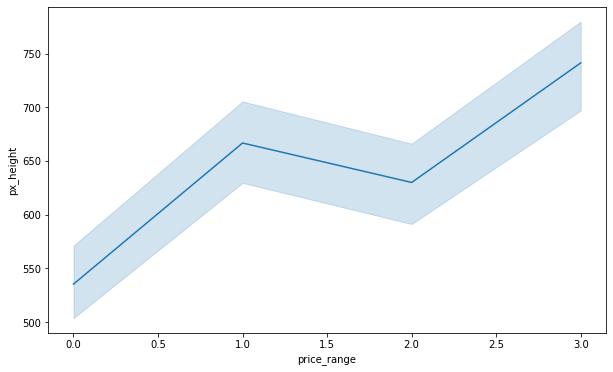

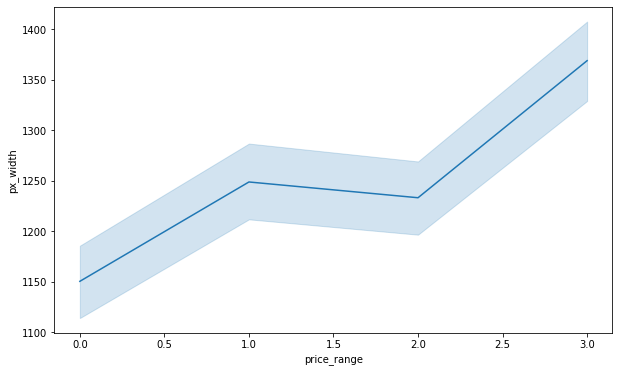

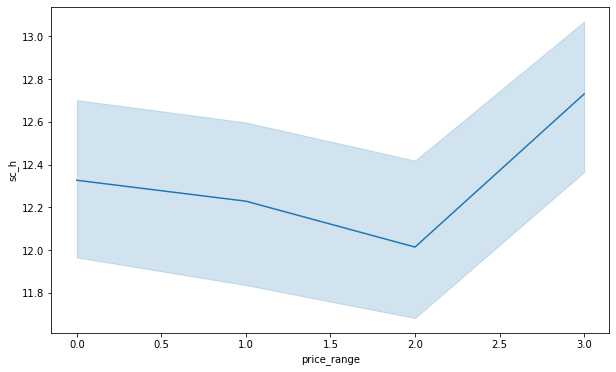

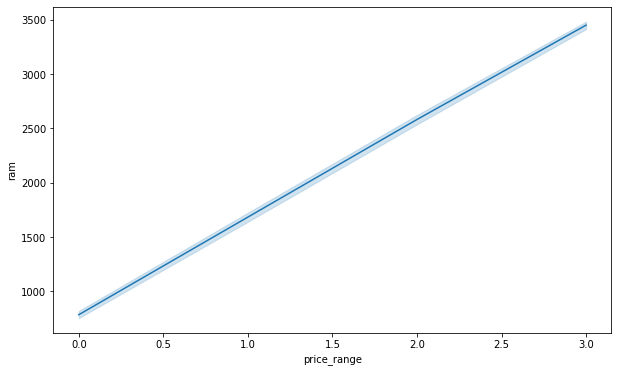

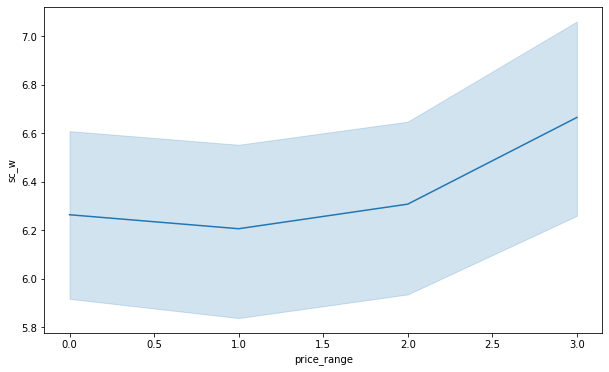

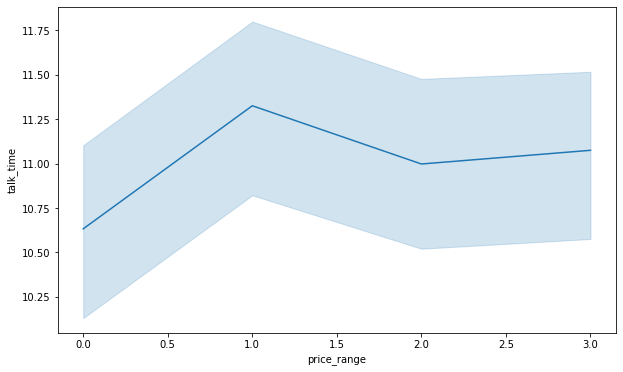

In [43]:
#creating lineplot of all major features wrt to target variable
features_=['pc','battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','sc_h','ram','sc_w','talk_time']

for i in features_:
  plt.figure(figsize=(10,6))
  sns.lineplot(y=data[i], x="price_range", data=data)

## Observation

####1. As battery power increases price also increases whcih is quite obivious.
####2. For class 1 and class2 battery power range is almost similar.
####3. Mobiles having max screen height and width falls in very high price category. 
####4. We can see in line plot of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. 


## 12) Plotting Pairplot visualization of all features

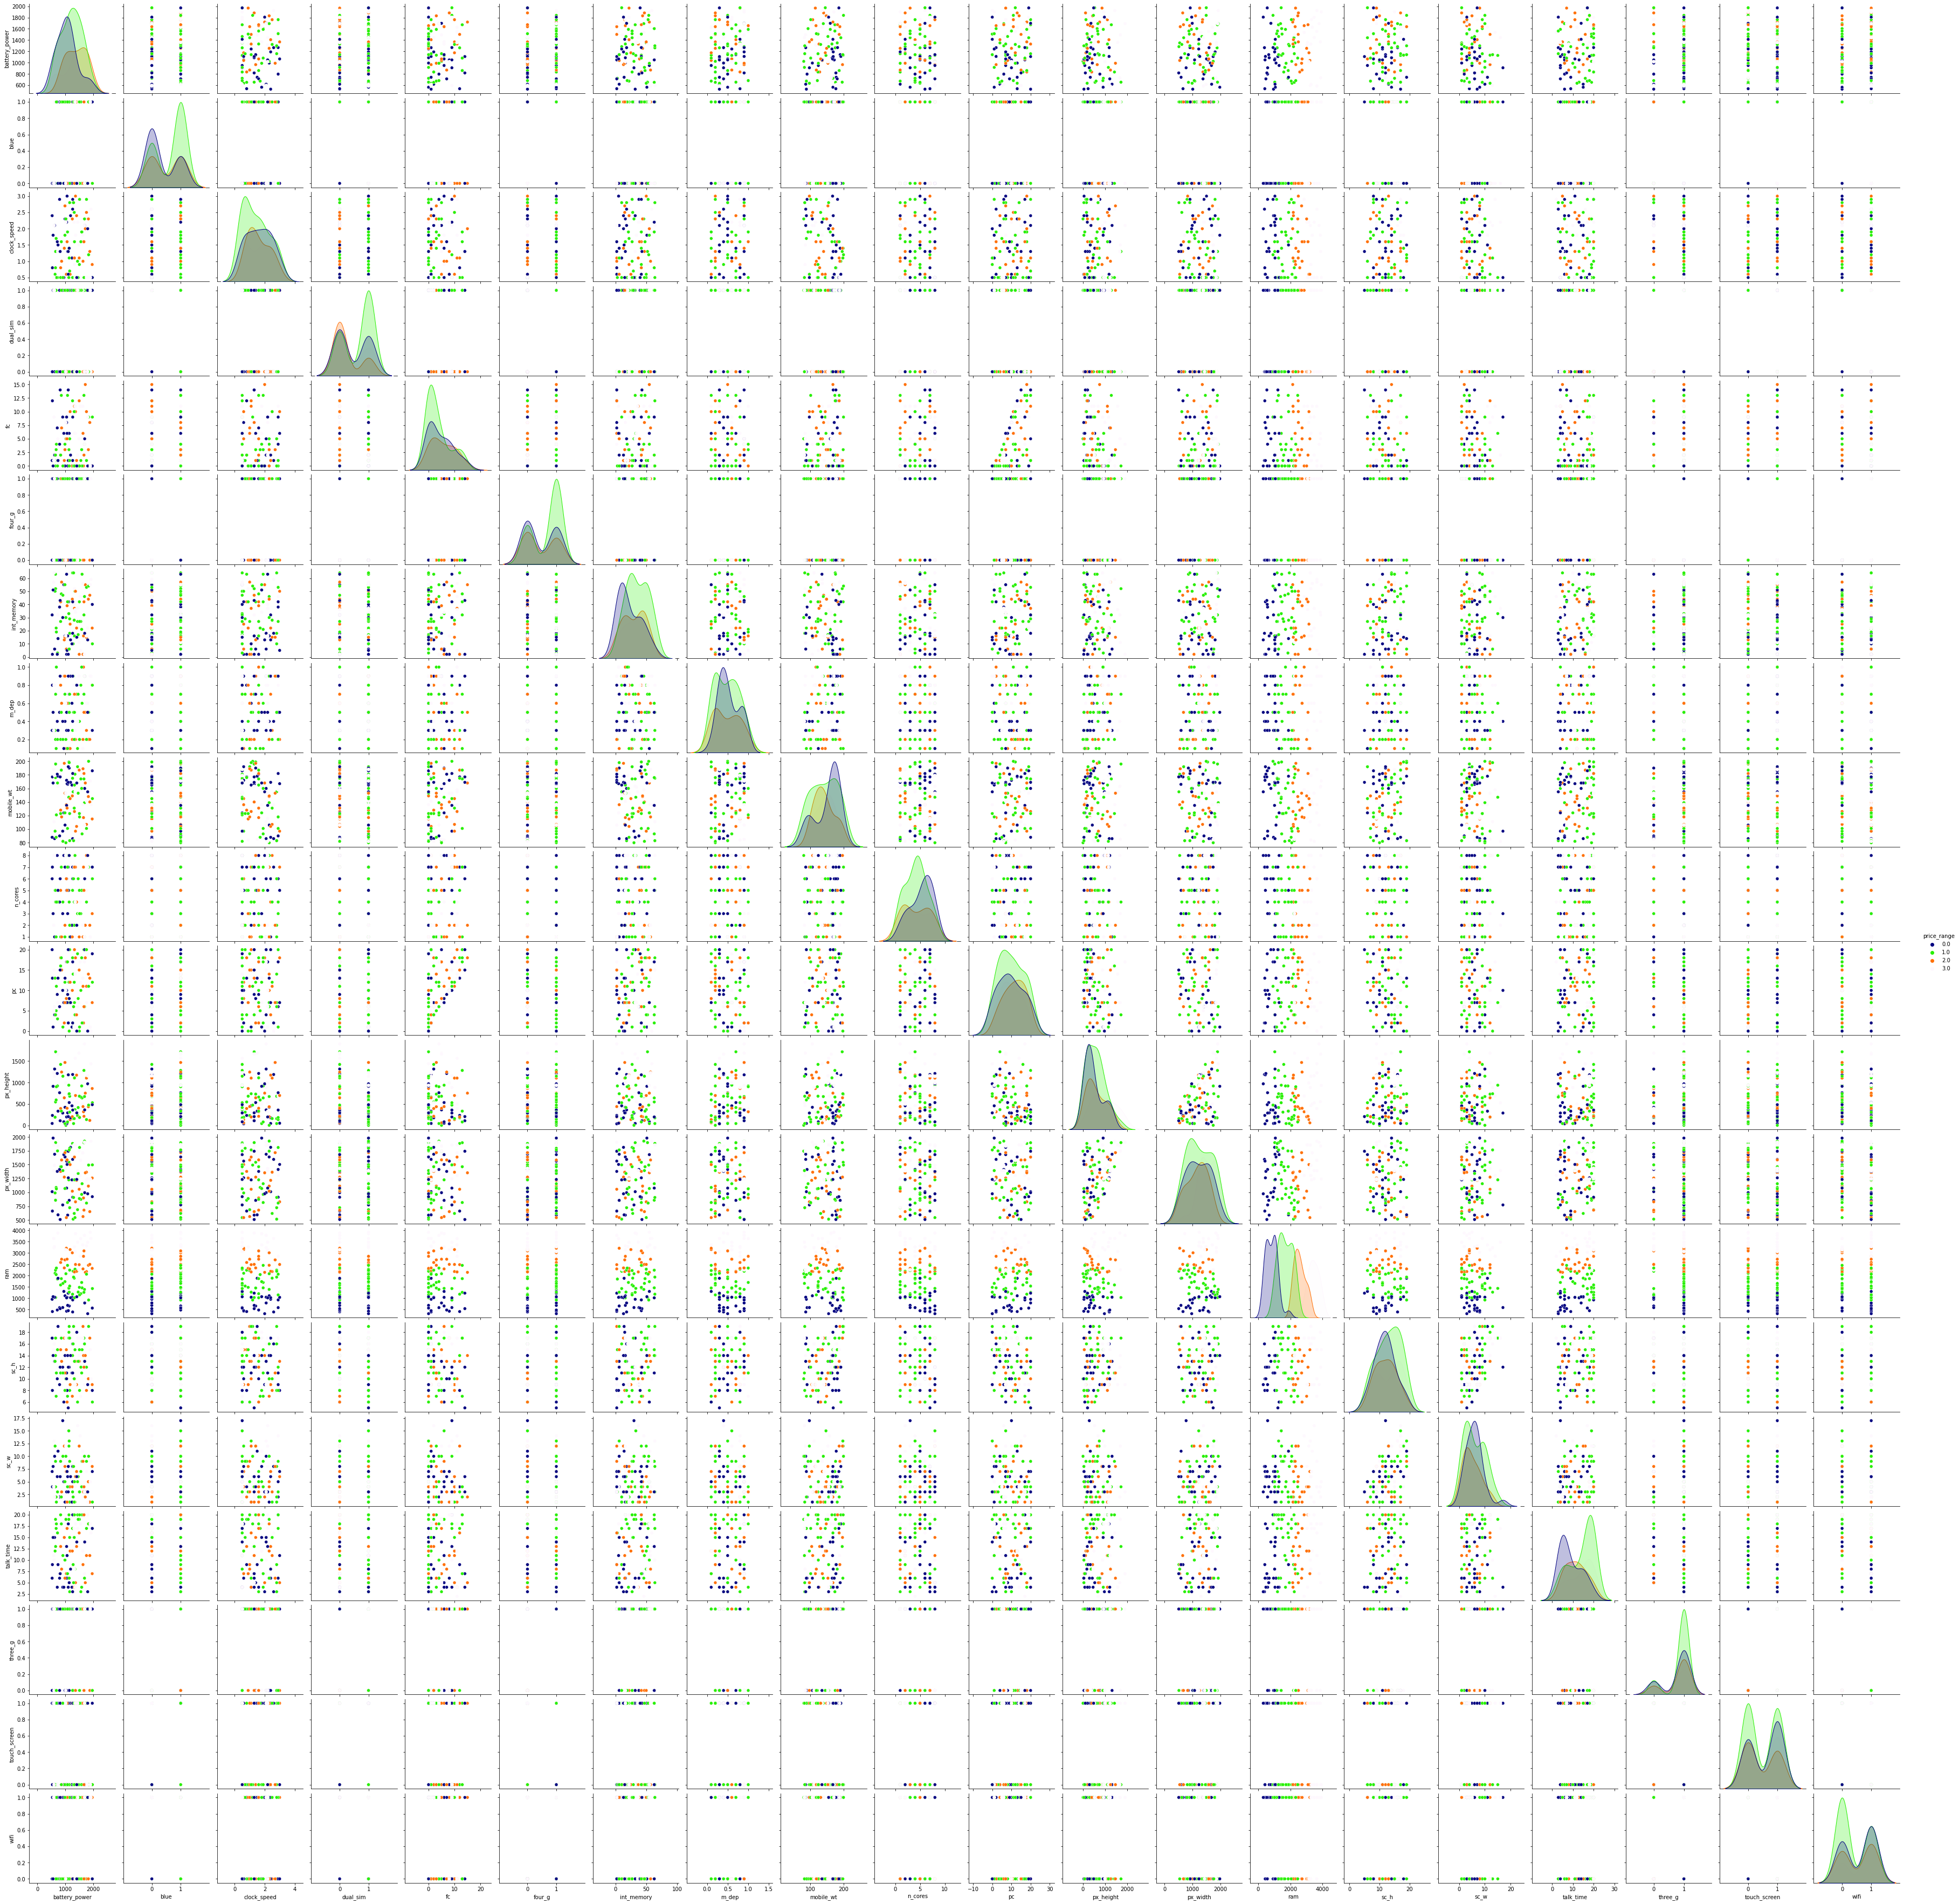

In [44]:
# plotting a Pairplot
sns.pairplot(data=data.sample(100) ,hue='price_range' , palette='gist_ncar') 

## 13) Correlation Matrix

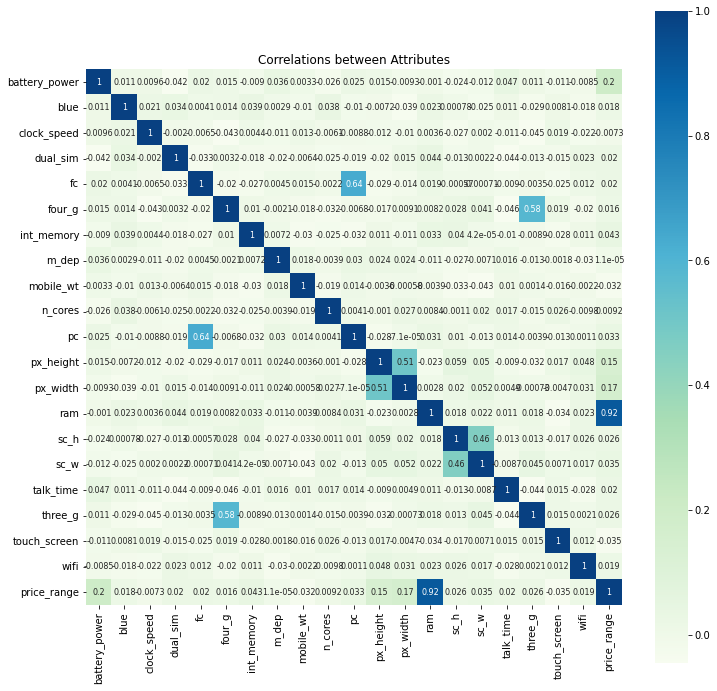

In [45]:
# Plotting the heatmap for Correlation analysis
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

## Observation
##### Here, we can see that the following have high correlation with each other :

#####1. **price_range and RAM**

#####2. **three_g and four_g**

#####3. **px_width and px_height**

#####4. **pc and fc**

#####5. The most influential variable is RAM.




---



# **IT's TIME FOR TRAINING AND MODELLING**

##**Preparing data for Model**

In [46]:
# Splitting our Dataset
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [47]:
# importing required library for training and testing
from sklearn.model_selection import train_test_split
# Splitting the dataset training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1485, 20)
(495, 20)
(1485,)
(495,)


In [48]:
# Transforming the data using StandardScaler module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# creating a categorical values of Target values as a list
Class_categorical = ['low cost','medium cost', 'high cost', 'very high cost']

In [50]:
# installing category-encoding for encoding process of target variable
%%capture
!pip install category-encoders

In [51]:
#importing category_encoding for encoding process of target variable
import category_encoders as ce

In [52]:
# importing SimpleImputer module to do median imputation
from sklearn.impute import SimpleImputer

In [53]:
# Create a dictionary holding all Classifiers and preprocessing techniques
models = {
    "RandomForest": make_pipeline(ce.OneHotEncoder(), SimpleImputer(strategy="median"),RandomForestClassifier()),
    "K Nearest Neighbour": make_pipeline(ce.OneHotEncoder(), SimpleImputer(strategy="median"),KNeighborsClassifier()),
    "Descision Tree": make_pipeline(ce.OneHotEncoder(),SimpleImputer(strategy="median") ,DecisionTreeClassifier()),
    "SGDClassifier": make_pipeline(ce.OneHotEncoder(),SimpleImputer(strategy="median") ,SGDClassifier()),
    "AdaBoost": make_pipeline(ce.OneHotEncoder(),SimpleImputer(strategy="median") ,AdaBoostClassifier()),
    "GradientBoosting": make_pipeline(ce.OneHotEncoder(),SimpleImputer(strategy="median") ,GradientBoostingClassifier()),
    "XGBClassifier": make_pipeline(ce.OneHotEncoder(),SimpleImputer(strategy="median") ,XGBClassifier()),
    "Logistic Regression": make_pipeline(ce.OneHotEncoder(),SimpleImputer(strategy="median") ,LogisticRegression()),
    "SuperVectorMachine": make_pipeline(ce.OneHotEncoder(),SimpleImputer(strategy="median") ,SVC()),
    "Naive Bias": make_pipeline(ce.OneHotEncoder(),SimpleImputer(strategy="median") ,GaussianNB()),
}

In [54]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=9000)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [55]:
col = data.iloc[:,:20].columns

In [56]:
# Evaluating models
Score_list = []
Models_list = []
x=[]


# Iterating over models dictionary and evaluating each separately
for key, value in models.items():
    score = evaluate_model(value, X, y)
    Score_list.append(score) 
    Models_list.append(key) 
    print(f"Model_name: {key}, Score: {np.mean(score)}")
    x.append(np.mean(score))

Model_name: RandomForest, Score: 0.8775252525252526
Model_name: K Nearest Neighbour, Score: 0.9196969696969696
Model_name: Descision Tree, Score: 0.8358585858585859
Model_name: SGDClassifier, Score: 0.5017676767676769
Model_name: AdaBoost, Score: 0.669949494949495
Model_name: GradientBoosting, Score: 0.9078282828282829
Model_name: XGBClassifier, Score: 0.9045454545454545
Model_name: Logistic Regression, Score: 0.6300505050505051
Model_name: SuperVectorMachine, Score: 0.9522727272727274
Model_name: Naive Bias, Score: 0.803030303030303


## Finding the *Best Algorithm* with default parameter 

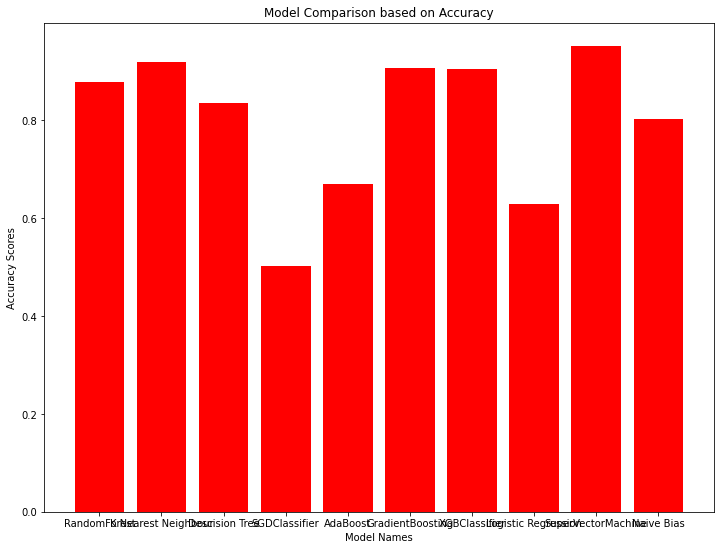

In [57]:
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(Models_list, x,color = 'red')
plt.ylabel("Accuracy Scores")
plt.xlabel("Model Names")
plt.title("Model Comparison based on Accuracy")
plt.show()

## Observation:
#### Bar graph shows that SVC is the model which have high score followed by KNN.

In [58]:
#Creating empty list for storing metrices scores
train_accuracy_score = []
test_accuracy_score  = [] 
train_precision_score = []
test_precision_score =[]
train_recall_score  = []
test_recall_score  = []
train_f1_score = []
test_f1_score = []


In [59]:
# Writing a function for evaluation metrics and to see Confusion Matrix
def matrix(model,x_train,x_test,y_train,y_true, logistic = False):

  Categorical_values_of_price_range = ['low cost','medium cost', 'high cost', 'very high cost']
  # Fitting the model
  model.fit(x_train,y_train)
  print('\n')
  print('='*10, 'Training score','='*10)
  training = model.score(x_train,y_train)
  print('\n')
  print('Training score  = ', training)
 
  print('\n')

  # Seeing the grid search SC or random search CV printing best parameters and their best scores
  print('='*20, 'Best Parameters and Best score','='*20)
  try:
    print('best parameters  =  ', model.best_params_)
    print('Best score  =  ', model.best_score_)
  except:
    pass

  # predicting x_train
  train_pred = model.predict(x_train) 
  # predicting x_test
  test_pred = model.predict(x_test)
  print('\n')

  # printing all metrices scores on training set and test set
  print('='*20, 'Metrices scores on Train and Test Set','='*20)
  train_accuracy = accuracy_score(y_train,train_pred)
  test_accuracy = accuracy_score(y_true,test_pred)
  print('Train Accuracy score = ',train_accuracy)
  print('Test Accuracy score = ',test_accuracy)
  train_precision = precision_score(y_train,train_pred,average='micro')
  test_precision = precision_score(y_true,test_pred,average='micro')
  print('Train Precision score = ', train_precision)
  print('Test Precision score = ', test_precision)
  train_recall = recall_score(y_train,train_pred,average='micro')
  test_recall = recall_score(y_true,test_pred,average='micro')
  print('Train Recall score = ',train_recall)
  print('Test Recall score = ',test_recall)
  train_f1 = f1_score(y_train,train_pred,average='micro')
  test_f1 = f1_score(y_true,test_pred,average='micro')
  print('Train F1 score = ',train_f1) 
  print('Test F1 score = ',test_f1) 
 
  print('\n')

 
  #classification report
  from sklearn import metrics
  print("classification report")
  print(metrics.classification_report(y_test, test_pred))
  
 

 
# Confusion matrix for test set.
  cf_matrix=confusion_matrix(y_true,test_pred)
  cf_matrix
  # label the confusion matrix  
  conf_matrix=pd.DataFrame(data=cf_matrix,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
  # plot a heatmap
  # plotting confusion matrix for test set.
  plot_confusion_matrix(model,x_test,y_true,cmap='Blues',display_labels=Categorical_values_of_price_range,xticks_rotation='vertical')
  plt.grid(False)
  plt.title('Confusion Matrix-test-set',fontsize=15)
  plt.show()

  
# Confusion matrix for train set.
  cf_matrix=confusion_matrix(y_train,train_pred)
  cf_matrix
  # label the confusion matrix  
  conf_matrix=pd.DataFrame(data=cf_matrix,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
  # plot a heatmap
  # plotting confusion matrix for test set.
  plot_confusion_matrix(model,x_train,y_train,cmap='Blues',display_labels=Categorical_values_of_price_range,xticks_rotation='vertical')
  plt.grid(False)
  plt.title('Confusion Matrix_training_set',fontsize=15)
  plt.show()
  
 

 



  
  train_accuracy_score.append(train_accuracy)
  test_accuracy_score.append(test_accuracy)
  train_precision_score.append(train_precision)
  test_precision_score.append(test_precision)
  train_recall_score.append(train_recall)
  test_recall_score.append(test_recall)
  train_f1_score.append(train_f1)
  test_f1_score.append(test_f1)
 

  
  
  return train_pred,test_pred





---



# **NOW, IT IS TIME FOR IMPLEMENTING MACHINE LEARNING ALGORITHMS**

## **1) Logistic Regression**

## A) Logistic Regression with default parameter

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


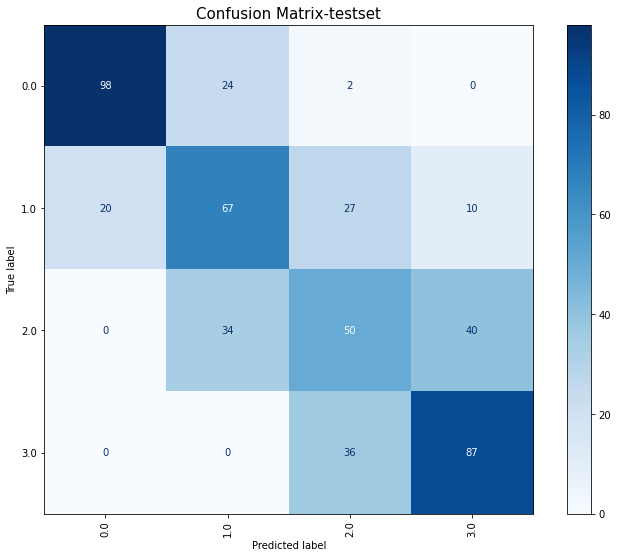

classification report
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       124
         1.0       0.54      0.54      0.54       124
         2.0       0.43      0.40      0.42       124
         3.0       0.64      0.71      0.67       123

    accuracy                           0.61       495
   macro avg       0.61      0.61      0.61       495
weighted avg       0.61      0.61      0.61       495



In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred_log=lr.predict(X_train)
y_test_pred_log = lr.predict(X_test)

# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_test_pred_log)
cf_matrix
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cf_matrix,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])

# plotting confusion matrix for test set.
plot_confusion_matrix(lr,X_test,y_test,cmap='Blues',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()
#Calculate Accuracy
acc_lr = accuracy_score(y_test, y_test_pred_log)


#classification report
from sklearn import metrics
print("classification report")
print(metrics.classification_report(y_test, y_test_pred_log))

In [61]:
print(f"accuracy score of logistic regression  of train data = {accuracy_score(y_train, y_train_pred_log)}")
print(f"accuracy score of logistic regression  of test data = {accuracy_score(y_test, y_test_pred_log)}")

accuracy score of logistic regression  of train data = 0.6444444444444445
accuracy score of logistic regression  of test data = 0.6101010101010101


## B) Logistic Regression with HYPERPARAMETER TUNING


In [62]:
# Parameters for logistic regression
logistic_parameters = {'C': [1.623776739188721], #np.logspace(-4,4,20),
                       'penalty':['l1'], # 'l2', 'elasticnet','None'],
                       #'n_components' : list(range(1,X.shape[1]+1,1)),
                       'solver':['saga'],#'lbfgs','newton-cg','sag','saga'],
                       'max_iter':[100] #,1000,2500,5000],
                       #'class_weight':['balanced'],#'dict',],
}
# After finding the best parameters, we commented on all the other parameters for faster execution

In [63]:
# Using Grid Search for Hyperparameter Tuning
L_grid_Search = GridSearchCV(LogisticRegression(),param_grid=logistic_parameters,cv=4,verbose=3,scoring='accuracy')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END C=1.623776739188721, max_iter=100, penalty=l1, solver=saga;, score=0.968 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/4] END C=1.623776739188721, max_iter=100, penalty=l1, solver=saga;, score=0.970 total time=   0.1s
[CV 3/4] END C=1.623776739188721, max_iter=100, penalty=l1, solver=saga;, score=0.960 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/4] END C=1.623776739188721, max_iter=100, penalty=l1, solver=saga;, score=0.968 total time=   0.1s


========== Training score ==========


Training score  =  0.9858585858585859


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best score  =   0.9663290148682723


==================== Metrices scores on Train and Test Set ====================
Train Accuracy score =  0.9858585858585859
Test Accuracy score =  0.9616161616161616


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Train Precision score =  0.9858585858585859
Test Precision score =  0.9616161616161616
Train Recall score =  0.9858585858585859
Test Recall score =  0.9616161616161616
Train F1 score =  0.9858585858585859
Test F1 score =  0.9616161616161616


classification report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       124
         1.0       0.97      0.90      0.93       124
         2.0       0.93      0.98      0.96       124
         3.0       0.99      0.98      0.99       123

    accuracy                           0.96       495
   macro avg       0.96      0.96      0.96       495
weighted avg       0.96      0.96      0.96       495



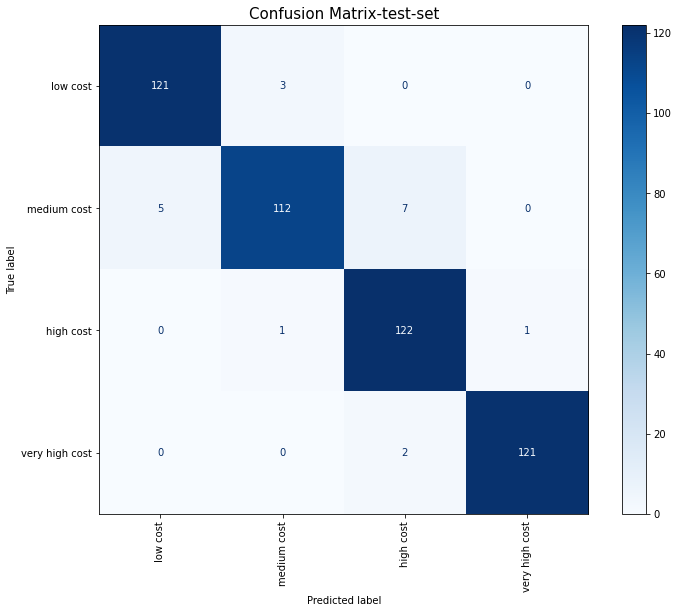

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


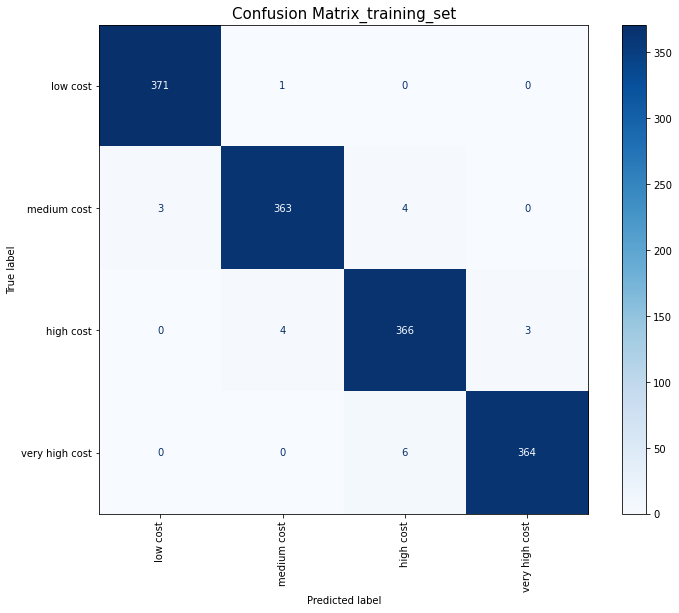

In [64]:
# Fit and evalute model with the help of self define function
logistic_train_pred, logistic_test_pred = matrix(L_grid_Search,X_train_scaled,X_test_scaled,y_train,y_test)

## Observation

### 1.Before hyperparameter tuning:
#### a) **train data accuracy** =  64%
#### b) **test data accuracy**  =  61%

     

### 2.After hyperparameter tuning:
#### a) **train data accuracy** = 98%
#### b) **test data accuracy**  = 96%
       

      

## **2) Decision Tree Classifier**

## A) Decision Tree with default parameter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


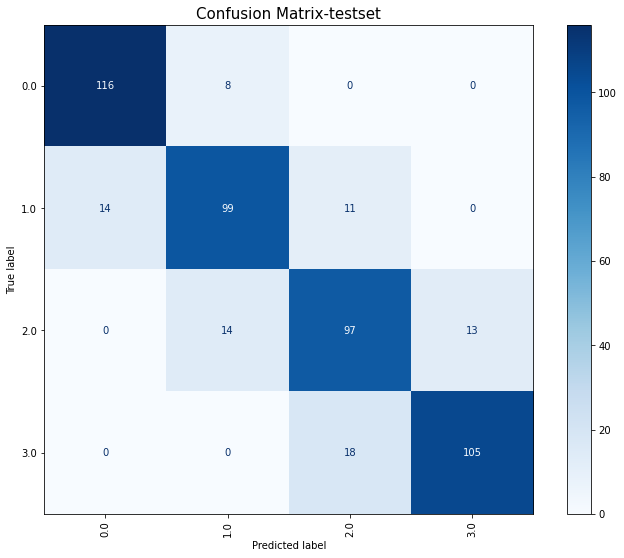

classification report
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       124
         1.0       0.82      0.80      0.81       124
         2.0       0.77      0.78      0.78       124
         3.0       0.89      0.85      0.87       123

    accuracy                           0.84       495
   macro avg       0.84      0.84      0.84       495
weighted avg       0.84      0.84      0.84       495



In [65]:
D_Tree = DecisionTreeClassifier()
D_Tree.fit(X_train, y_train)
y_train_pred_dtc=D_Tree.predict(X_train)
y_test_pred_dtc = D_Tree.predict(X_test)

cff_=confusion_matrix(y_test,y_test_pred_dtc) #Visualizing the Confusion Matrix
cff_

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cff_,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
# plotting confusion matrix for test set.
plot_confusion_matrix(D_Tree,X_test,y_test,cmap='Blues',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()
#Calculate Accuracy

acc_dtc = accuracy_score(y_test, y_test_pred_dtc)


#classification report
from sklearn import metrics
print("classification report")
print(metrics.classification_report(y_test, y_test_pred_dtc))



In [66]:
print(f"accuracy score of Decision Tree Classifier with train data = {accuracy_score(y_train, y_train_pred_dtc)}")
print(f"accuracy score of Decision Tree Classifier with test data = {accuracy_score(y_test, y_test_pred_dtc)}")


accuracy score of Decision Tree Classifier with train data = 1.0
accuracy score of Decision Tree Classifier with test data = 0.8424242424242424


## B) Decision Tree with hyperparameter tuning

Fitting 5 folds for each of 1 candidates, totalling 5 fits


========== Training score ==========


Training score  =  0.9562289562289562


==================== Best Parameters and Best score ====================
best parameters  =   {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5}
Best score  =   0.8491582491582491


==================== Metrices scores on Train and Test Set ====================
Train Accuracy score =  0.9562289562289562
Test Accuracy score =  0.8404040404040404
Train Precision score =  0.9562289562289562
Test Precision score =  0.8404040404040404
Train Recall score =  0.9562289562289562
Test Recall score =  0.8404040404040404
Train F1 score =  0.9562289562289562
Test F1 score =  0.8404040404040404


classification report
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       124
         1.0       0.82      0.79      0.80       124
         2.0       0.75      0.80      0.77       124
         3.0      

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


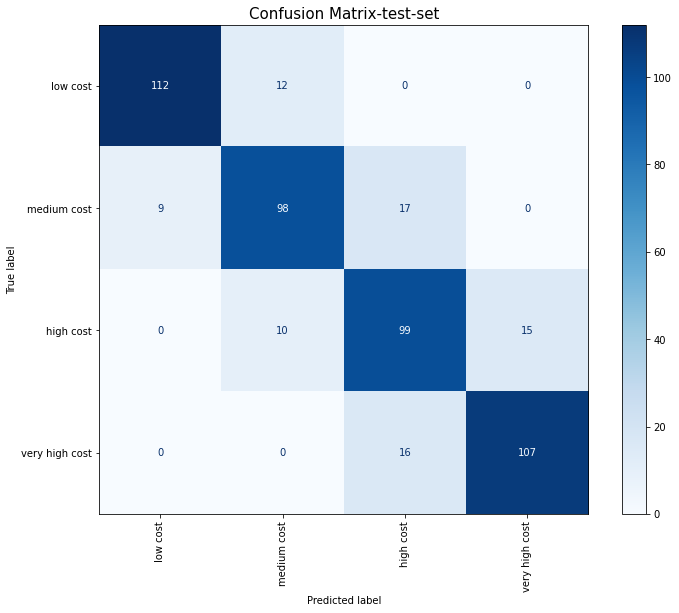

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


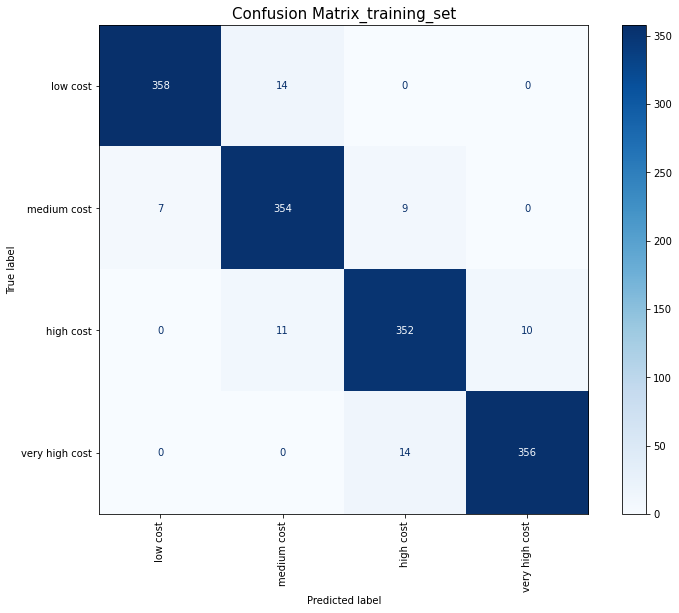

In [67]:
# parametrs for decision tree
d_tree_params = {
    'max_depth': [9],#1,2, 3,4, 5, 6,7,8,9,10, 20],
    'min_samples_leaf': [5],#, 10, 20, 50, 100],
    'criterion': ["entropy"],#,"gini", ]
}
# using grid search cv for hyperparameter tuning
dtree_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=d_tree_params,cv=5,verbose=3,n_jobs=-1)
# Fit and evalute model with the help of self define function
#dstree_train_pred, dstree_test_pred = matrix(dtree_grid,X_train_scaled,X_test_scaled,y_train,y_test)

dstree_train_pred, dstree_test_pred = matrix(dtree_grid,X_train_scaled,X_test_scaled,y_train,y_test)

## Observation:

### 1. Before hyperparameter tuning:
####a). **train data accuracy** = 100%
####b). **test data accuracy**  = 82%

#### Important Note:
##### Model is overfitted on train set and did not generalised well. We will tune hyperparamters to reduce overfitting and try to improve the model performance.

### 2. After hyperparameter tuning:
####a). **train data accuracy** = 95%
####b). **test data accuracy**  = 85%

#### Important Note:
##### Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.




## 3) **Random Forest**

## A) Random Forest with default parameter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


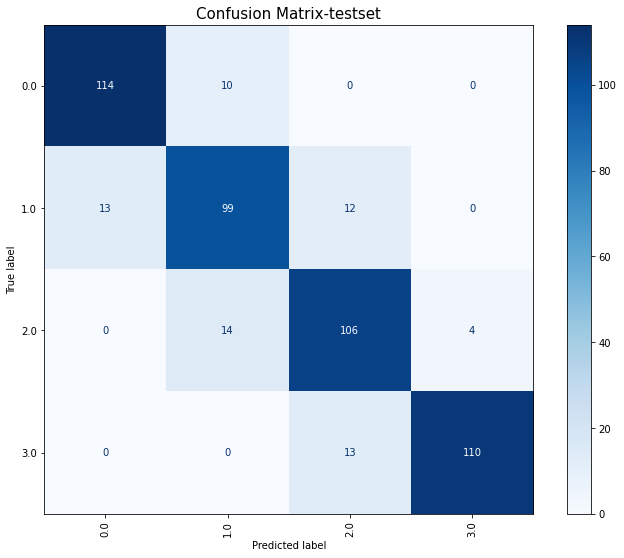

classification report
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       124
         1.0       0.80      0.80      0.80       124
         2.0       0.81      0.85      0.83       124
         3.0       0.96      0.89      0.93       123

    accuracy                           0.87       495
   macro avg       0.87      0.87      0.87       495
weighted avg       0.87      0.87      0.87       495



In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=0,criterion = 'entropy',oob_score = True) 
rf.fit(X_train, y_train)
y_train_pred_rf=D_Tree.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred_rf)  #Visualizing the Confusion Matrix
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
plot_confusion_matrix(rf,X_test,y_test,cmap='Blues',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()
#Calculate Accuracy
acc_rf = accuracy_score(y_test, y_test_pred_rf)
#classification report
from sklearn import metrics
print("classification report")
print(metrics.classification_report(y_test, y_test_pred_rf))


In [69]:
print(f"accuracy scores of RandomForest with train data = {accuracy_score(y_train,y_train_pred_rf)}")
print(f"accuracy of RandomForest with test data = {accuracy_score(y_test,y_test_pred_rf)}")

accuracy scores of RandomForest with train data = 1.0
accuracy of RandomForest with test data = 0.8666666666666667


## B) RandomForest with hyperparameter tunning

In [70]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[80], #[int(x) for x in np.linspace(start=10,stop=80,num=10)],
          'max_depth':[10],#auto, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['gini'],#,'entropy'],
          'max_features':['auto'],#,'log2','sqrt']
          
             }

In [71]:
# creating the instance 
rfc_= RandomForestClassifier(random_state=0)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=80;, score=0.873 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=80;, score=0.883 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=80;, score=0.863 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=80;, score=0.879 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=80;, score=0.865 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=80;, score=0.869 total time=   0.3s
[CV 1/3] END criterion=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


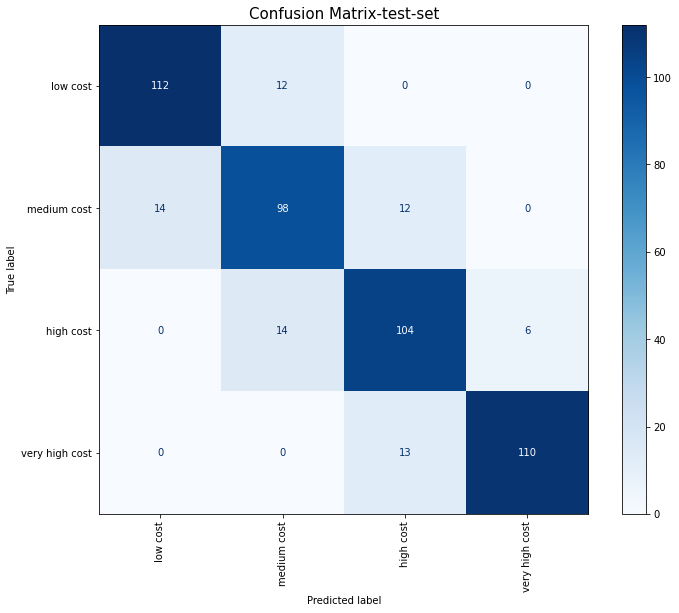

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


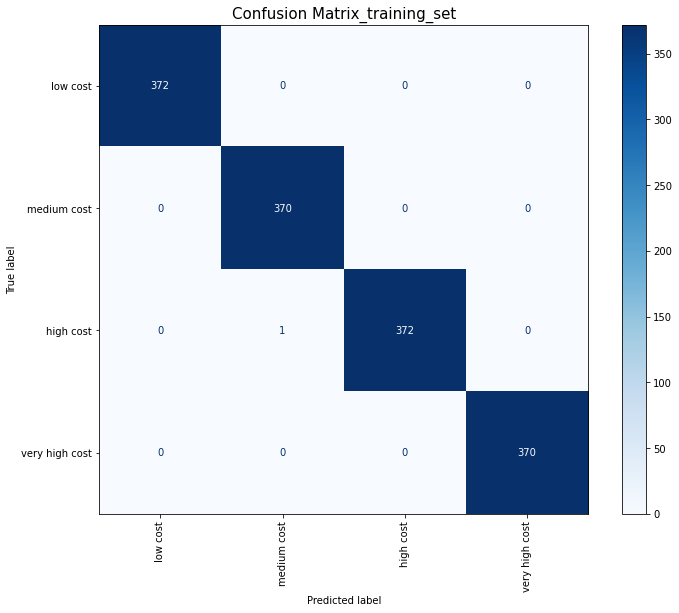

In [72]:
# Applying GridSearchCV
rfc_grid=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')

rfc_train_pred, rfc_test_pred = matrix(rfc_grid,X_train_scaled,X_test_scaled,y_train,y_test)

## Observation

### 1.Before hyperparameter tuning:
####a). **train data accuracy** = 100%
####b). **test data accuracy**  = 86%

#### Important Note:
##### Model is overfitted on train set and did not generalised well. We will tune hyperparamters to reduce overfitting and try to improve the model performance.

### 2. After hyperparameter tuning:
####a). **train data accuracy**--  99%
####b). **test data accuracy**--87%
       
#### Important Note:
##### Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.




## 4) **K Nearest Neighbours**

## A) KNN wIth default parameter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


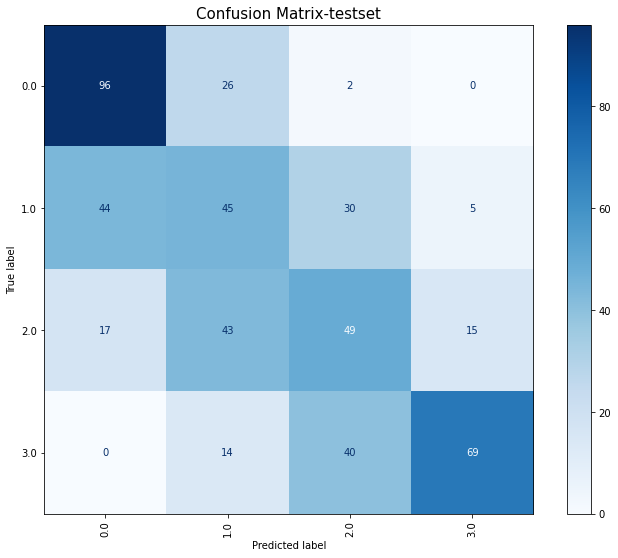

classification report
              precision    recall  f1-score   support

         0.0       0.61      0.77      0.68       124
         1.0       0.35      0.36      0.36       124
         2.0       0.40      0.40      0.40       124
         3.0       0.78      0.56      0.65       123

    accuracy                           0.52       495
   macro avg       0.54      0.52      0.52       495
weighted avg       0.54      0.52      0.52       495



0.5232323232323233

In [73]:
from sklearn.neighbors import KNeighborsClassifier  
# Finding optimal KNN Grid Search Method
from sklearn.model_selection import GridSearchCV

#Printing optimal n-neighbors
knn = KNeighborsClassifier()  
knn.fit(X_train_scaled, y_train)
y_train_pred_knn=knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_knn)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a confusion matrix
plot_confusion_matrix(knn,X_test_scaled,y_test,cmap='Blues',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()
#classification report
from sklearn import metrics
print("classification report")
print(metrics.classification_report(y_test, y_test_pred_knn))

#Calculate Accuracy
acc_knn = accuracy_score(y_test, y_test_pred_knn)
acc_knn

In [74]:
print(f"accuracy of training data before applying hyperparameter tuning on KNN = {accuracy_score(y_train,y_train_pred_knn)}")
print(f"accuracy of testing data before applying hyperparameter tuning on KNN = {accuracy_score(y_test,y_test_pred_knn)}")

accuracy of training data before applying hyperparameter tuning on KNN = 0.6962962962962963
accuracy of testing data before applying hyperparameter tuning on KNN = 0.5232323232323233


## B) KNN with using HYPERPARAMETER TUNING

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......algorithm=auto, leaf_size=50, n_neighbors=21; total time=   0.0s
[CV] END .......algorithm=auto, leaf_size=50, n_neighbors=21; total time=   0.0s
[CV] END .......algorithm=auto, leaf_size=50, n_neighbors=21; total time=   0.0s
[CV] END .......algorithm=auto, leaf_size=50, n_neighbors=21; total time=   0.0s
[CV] END .......algorithm=auto, leaf_size=50, n_neighbors=21; total time=   0.0s


========== Training score ==========


Training score  =  0.674074074074074


==================== Best Parameters and Best score ====================
best parameters  =   {'algorithm': 'auto', 'leaf_size': 50, 'n_neighbors': 21}
Best score  =   0.5952861952861952


==================== Metrices scores on Train and Test Set ====================
Train Accuracy score =  0.674074074074074
Test Accuracy score =  0.6282828282828283
Train Precision score =  0.674074074074074
Test Precision score =  0.6282828282828283
Train Recall scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


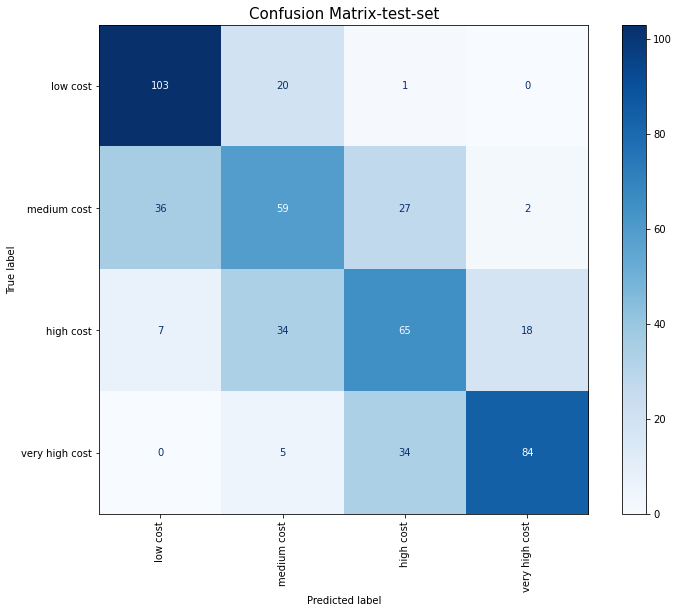

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


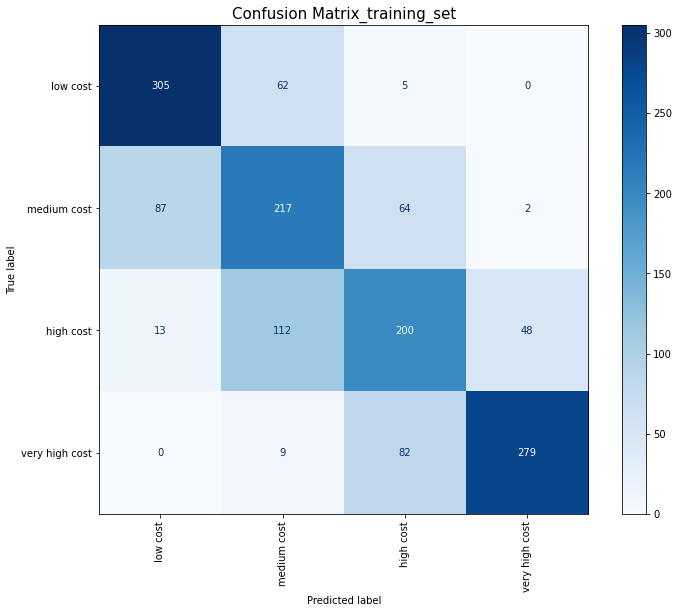

In [75]:
# creating an object of classifier
KNN=KNeighborsClassifier()
# parameter grid values.
k=21
grid_values =   {
    'n_neighbors':[21], #list(range(1, 31)),
    'algorithm':['auto'], #,'auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[50], #,20,30,40,]
}                                                                       
# applyong GridSearchCv with above grid values and cv=5
knn_grid=GridSearchCV(KNN,cv=5,verbose=2,param_grid=grid_values)
knn_train_pred, knn_test_pred = matrix(knn_grid,X_train_scaled,X_test_scaled,y_train,y_test)

## Observation
### 1.Before hyperparameter tuning:
#### a). **train data accuracy** = 69%
#### b). **test data accuracy**  = 52%

#### Important Note: 
##### Model is overfitted on train set and did not generalised well. We will tune hyperparamters to reduce overfitting and try to improve the model performance.

### 2. After hyperparameter tuning:
#### a). **train data accuracy** = 67%
#### b). **test data accuracy**  = 59%

#### Important Note:
##### Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.




## 5)  **SuperVectorMachine**

## A) SVM with default parameter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


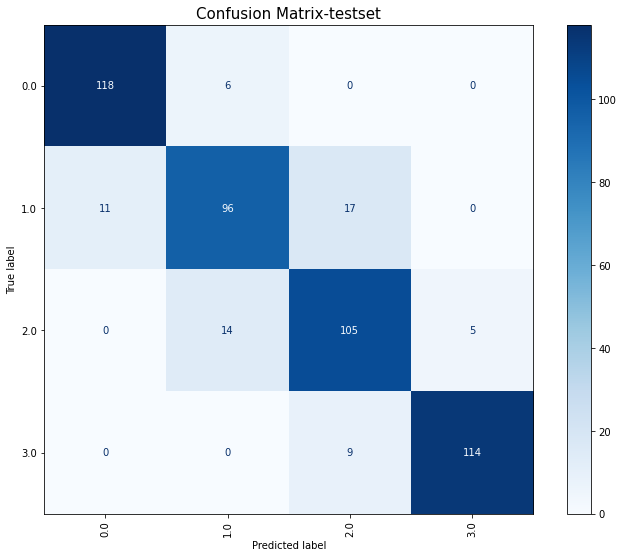

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       124
         1.0       0.83      0.77      0.80       124
         2.0       0.80      0.85      0.82       124
         3.0       0.96      0.93      0.94       123

    accuracy                           0.87       495
   macro avg       0.88      0.87      0.87       495
weighted avg       0.88      0.87      0.87       495



In [76]:
from sklearn.svm import SVC 
svm = SVC()  
svm.fit(X_train_scaled,y_train)   
y_train_pred_svm=svm.predict(X_train_scaled)               
y_test_pred_svm = svm.predict(X_test_scaled)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_svm)
# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Budgeted", "Medium Cost", "Flagship"],index=["Low Cost", "Budgeted", "Medium Cost", "Flagship"])
# plot a heatmap
plot_confusion_matrix(svm,X_test_scaled,y_test,cmap='Blues',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()
#Calculate Accuracy
acc_svm = accuracy_score(y_test, y_test_pred_svm)  
#classification report
from sklearn import metrics
print("classification report")
print(metrics.classification_report(y_test, y_test_pred_svm))


In [77]:
print(f"accuracy of testing data before applying hyperparameter tuning on SVM = {accuracy_score(y_test,y_test_pred_svm)}")
print(f"accuracy of training data before applying hyperparameter tuning on SVM = {accuracy_score(y_train,y_train_pred_svm)}")

accuracy of testing data before applying hyperparameter tuning on SVM = 0.8747474747474747
accuracy of training data before applying hyperparameter tuning on SVM = 0.9885521885521885


## B) SVM with Hyperparameter tuning

In [78]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[10], #0.01,0.1,1,],
    'kernel' : ["linear"], #,"poly","rbf","sigmoid"],
    'degree' : [1], #,3,5,7],
    'gamma' : [0.01],#,1]
}

In [79]:
# creating an object for classifier
svm  = SVC ()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........C=10, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ..........C=10, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ..........C=10, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ..........C=10, degree=1, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ..........C=10, degree=1, gamma=0.01, kernel=linear; total time=   0.3s


========== Training score ==========


Training score  =  0.9865319865319865


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score  =   0.9569023569023569


==================== Metrices scores on Train and Test Set ====================
Train Accuracy score =  0.9865319865319865
Test Accuracy score =  0.9575757575757575
Train Precision score =  0.9865319865319865
Test Precision score =  0.9575757575757575
Train Recall s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


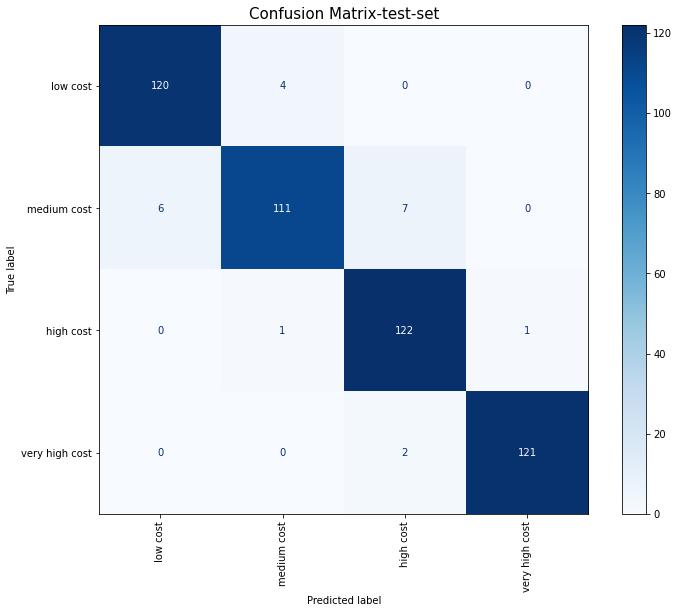

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


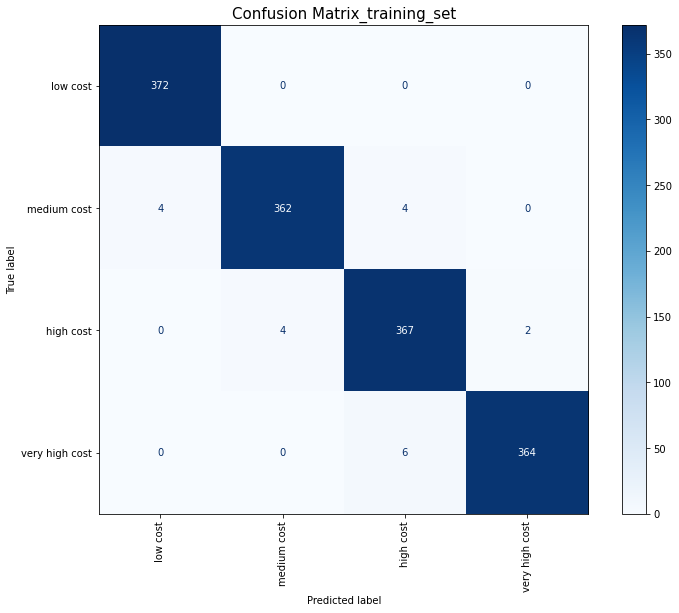

In [80]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_grid = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_train_pred, svm_test_pred = matrix(svm_grid,X_train_scaled,X_test_scaled,y_train,y_test)

## Observation
### 1.Before hyperparameter tuning:
####a). **train data accuracy** = 98%
####b)  **test data accuracy**  = 87%

#### Important note:
##### Model is overfitted on train set and did not generalised well. We will tune hyperparamters to reduce overfitting and try to improve the model performance.

### 2.After hyperparameter tuning:
####a). **train data accuracy** = 98%
####b). **test data accuracy**  = 95%
#### Important note:
##### Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.




In [81]:
# Lets see the training accuracy together again
train_accuracy_score

[0.9858585858585859,
 0.9562289562289562,
 0.9993265993265993,
 0.674074074074074,
 0.9865319865319865]

In [82]:
#making a dataframe where all evaluation metrics will be seen
matrix_with_hp=pd.DataFrame(list(zip(train_accuracy_score,test_accuracy_score,train_precision_score,test_precision_score,
                                 train_recall_score,test_recall_score,train_f1_score,test_f1_score)),
                        index=['Logistic Regression','DecisionTreeClassifier','Random Forest','K Nearest Neighbour',
                               'superVectormachine'],
                        columns=['Train accuracy score','Test accuracy score','Train precision score','Test precision score',
                                 'Train recall score','Test recall score','Train f1 score','Test f1 score'])

In [83]:
# Sorting the dataframe in descending order according to highest test recall score
metrics_with_hp=matrix_with_hp.sort_values("Test recall score",ascending=False).reset_index().rename(columns={'index':'model'})

In [84]:
#printing the dataframe
metrics_with_hp

model  Train accuracy score  Test accuracy score  \
0     Logistic Regression              0.985859             0.961616   
1      superVectormachine              0.986532             0.957576   
2           Random Forest              0.999327             0.856566   
3  DecisionTreeClassifier              0.956229             0.840404   
4     K Nearest Neighbour              0.674074             0.628283   

   Train precision score  Test precision score  Train recall score  \
0               0.985859              0.961616            0.985859   
1               0.986532              0.957576            0.986532   
2               0.999327              0.856566            0.999327   
3               0.956229              0.840404            0.956229   
4               0.674074              0.628283            0.674074   

   Test recall score  Train f1 score  Test f1 score  
0           0.961616        0.985859       0.961616  
1           0.957576        0.986532       0.957576  
2           0.856566        0.999327       0.856566  
3           0.840404        0.956229       0.840404  
4           0.628283        0.674074       0.628283

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


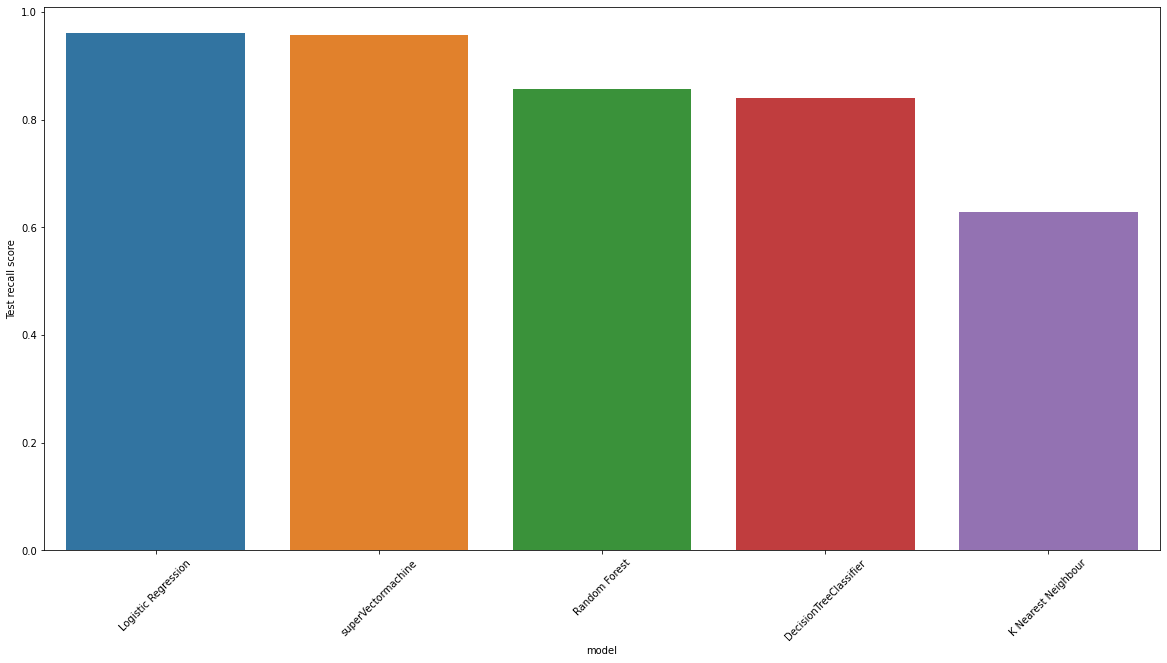

In [85]:
#Visualizing these 5 models with their test recall score using bar plot
plt.figure(figsize=(20,10))
sns.barplot(metrics_with_hp['model'],metrics_with_hp['Test recall score'])
plt.xticks(rotation=45)
plt.show()




---



# **CONCLUSION**

##1. With data exploration we found out that the price range is mostly affected by RAM, px_height, px_width, fc, pc, battery_power, four_g.
##2. As Higher the RAM, higher the PRICE.
##3. Performed modelling using various algorithms and also evaluated metrics such as training score. testing score and the main thing is test recall score.
##3. After hyperparameter tuning, we got to know that the there are two best predictive model we can use for prediction, i.e., Logistic Regression and SuperVectorMachine. But we are choosing SuperVectorMachine with test recall score as 0.957 as our predictive model.